## Step 1 Data Preprocessing

Imports

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

Creating a function that read the texts from the folders. While clipping the data into 600 datapoints.

In [2]:
def read_txt_files_into_single_dataframe(folder_path):
    data = []
    labels = []
    
    # List all files in the folder
    files = os.listdir(folder_path)
    prev_patient_id = os.path.splitext(files[0])[0][:-2]
    patient_data = []
    for file in files:
        label = os.path.splitext(file)[0][:-2]
        # Read the contents of the file
        with open(os.path.join(folder_path, file), 'r') as f:
            content = f.read()
            numbers = [float(num) for num in content.split()]
            if len(numbers) > 2100:
                numbers = numbers[0:2100]
            # Clip the numbers obtained into 1/10 of its size
            numbers = numbers[::10]
        # if label is equal to the previous patient id
        if prev_patient_id == label:
            # Add the numbers to the patient data
            patient_data += numbers
        # If the label is different from the patient id
        else:
            # Append the patient_data as a new row in data
            data.append(patient_data)
            # Re-initialize the patient_data as the numbers list
            patient_data = numbers
            # Append the previous patient id as a new row in the label
            labels.append(prev_patient_id)
            # Re-assign the prev_patient_id to the new label
            prev_patient_id = label
        # print(f"{prev_patient_id} - {len(patient_data)}")

    # Debugging function
    # print(f"Data: {[len(d) for d in data]}")
    # print(f"Labels: {labels}")

    data = np.array(data)
    # Create a DataFrame
    df = pd.DataFrame(data=data)
    df['label'] = labels
    return df

In [3]:
def read_txt_files_into_subpart_dataframe(folder_path):
    data = []
    labels = []
    
    # List all files in the folder
    files = os.listdir(folder_path)
    patient_data = []
    for file in files:
        label = os.path.splitext(file)[0][:-2]
        # Read the contents of the file
        with open(os.path.join(folder_path, file), 'r') as f:
            content = f.read()
            numbers = [float(num) for num in content.split()]
            if len(numbers) > 2100:
                numbers = numbers[0:2100]
            # Clip the numbers obtained into 1/10 of its size
            numbers = numbers[::10]
        # normalized_signal = detrended_signal / detrended_signal.max()
        
        data.append(numbers)
        # Append the label as a new row in the label
        labels.append(int(label))

    data = np.array(data)
    # Create a DataFrame
    df = pd.DataFrame(data=data)
    df['subject_id'] = labels
    return df

In [4]:
folder_path = "Database\Data\PPG"
df1 = read_txt_files_into_subpart_dataframe(folder_path)
df1

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,subject_id
0,1994.0,1983.0,2027.0,1993.0,1987.0,2000.0,1981.0,1991.0,1980.0,1991.0,...,2231.0,2189.0,2201.0,2185.0,2171.0,2138.0,2110.0,2147.0,2114.0,100
1,1942.0,1957.0,1955.0,1955.0,1932.0,1957.0,1909.0,1934.0,1909.0,1916.0,...,2367.0,2360.0,2290.0,2315.0,2298.0,2267.0,2248.0,2231.0,2212.0,100
2,2003.0,2007.0,1995.0,1970.0,1989.0,1992.0,1973.0,1998.0,1983.0,1977.0,...,1913.0,1981.0,1984.0,2047.0,2031.0,2080.0,2077.0,2099.0,2123.0,100
3,2147.0,2143.0,2164.0,2164.0,2158.0,2139.0,2156.0,2127.0,2134.0,2086.0,...,2120.0,2129.0,2096.0,2118.0,2060.0,2073.0,2078.0,2047.0,2066.0,103
4,1857.0,1875.0,1857.0,1867.0,1863.0,1872.0,1865.0,1937.0,1969.0,1990.0,...,2039.0,2097.0,2097.0,2139.0,2153.0,2144.0,2154.0,2153.0,2158.0,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,2050.0,2064.0,2004.0,1998.0,2030.0,1995.0,2009.0,1957.0,1995.0,1936.0,...,2179.0,2172.0,2174.0,2199.0,2196.0,2143.0,2152.0,2160.0,2140.0,99
653,2167.0,2169.0,2154.0,2153.0,2086.0,2073.0,2095.0,2039.0,2071.0,2054.0,...,1989.0,2047.0,2085.0,2122.0,2141.0,2157.0,2186.0,2197.0,2242.0,99
654,1961.0,1994.0,1983.0,1987.0,1960.0,1998.0,1966.0,1982.0,1954.0,1956.0,...,2017.0,2024.0,2024.0,2053.0,2044.0,2048.0,2029.0,2060.0,2059.0,9
655,2011.0,2037.0,1999.0,1983.0,2020.0,2007.0,2001.0,2007.0,1984.0,1981.0,...,1996.0,2026.0,1986.0,1992.0,2023.0,2015.0,1984.0,2000.0,2005.0,9


Example Data from the File

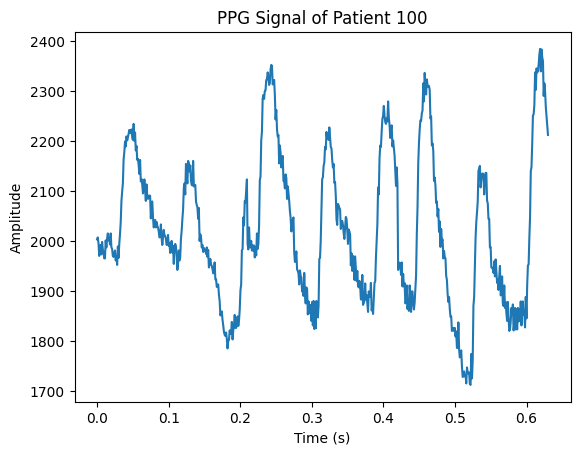

In [5]:
from scipy.fft import fft, fftfreq
files = ["100_3.txt", "100_1.txt", "100_2.txt"]
ppg = []
for file in files:
    with open(os.path.join(folder_path, file), 'r') as f:
        content = f.read()
        numbers = [float(num) for num in content.split()]
        if len(numbers) > 2100:
            numbers = numbers[0:2100]
        ppg += numbers[::10]
# Sampling Points
N = len(ppg)
# Sampling Time
T = 1 / 1000 # Every 1 millisecond

x = np.linspace(0, N*T, N)
y = np.array(ppg)
plt.title("PPG Signal of Patient 100")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.plot(x, y)

The DFT of the PPG signal of Patient 100 is shown below.

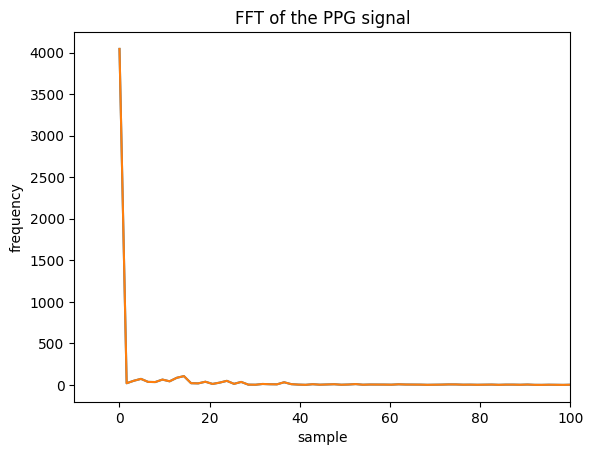

In [6]:
fftsignal = fft(ppg)
fftsignal = fftsignal[: N//2]
xf = fftfreq(N, T)[:N//2]
plt.ylabel('frequency')
plt.xlabel('sample')
plt.title("FFT of the PPG signal")
plt.plot(xf, 2.0/N * np.abs(fftsignal))
plt.xlim((-10, 100))
plt.plot(xf, 2.0/N * np.abs(fftsignal))
plt.show()

Read the data from an excel sheet and join it together to the dataframe

In [7]:
other_df = pd.read_excel("PPG BP.xlsx")
other_df

,subject_id,systolic_blood_pressure,diastolic_blood_pressure,heartrate
0,2,161,89,97
1,3,160,93,76
2,6,101,71,79
3,8,136,93,87
4,9,123,73,73
...,...,...,...,...
214,415,111,70,77
215,416,93,57,79
216,417,120,69,72
217,418,106,69,67


In [8]:
df = pd.merge(df1, other_df, on='subject_id', how='inner')
df

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,subject_id,systolic_blood_pressure,diastolic_blood_pressure,heartrate
0,1994.0,1983.0,2027.0,1993.0,1987.0,2000.0,1981.0,1991.0,1980.0,1991.0,...,2185.0,2171.0,2138.0,2110.0,2147.0,2114.0,100,140,82,73
1,1942.0,1957.0,1955.0,1955.0,1932.0,1957.0,1909.0,1934.0,1909.0,1916.0,...,2315.0,2298.0,2267.0,2248.0,2231.0,2212.0,100,140,82,73
2,2003.0,2007.0,1995.0,1970.0,1989.0,1992.0,1973.0,1998.0,1983.0,1977.0,...,2047.0,2031.0,2080.0,2077.0,2099.0,2123.0,100,140,82,73
3,2147.0,2143.0,2164.0,2164.0,2158.0,2139.0,2156.0,2127.0,2134.0,2086.0,...,2118.0,2060.0,2073.0,2078.0,2047.0,2066.0,103,120,60,76
4,1857.0,1875.0,1857.0,1867.0,1863.0,1872.0,1865.0,1937.0,1969.0,1990.0,...,2139.0,2153.0,2144.0,2154.0,2153.0,2158.0,103,120,60,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,2050.0,2064.0,2004.0,1998.0,2030.0,1995.0,2009.0,1957.0,1995.0,1936.0,...,2199.0,2196.0,2143.0,2152.0,2160.0,2140.0,99,133,71,80
653,2167.0,2169.0,2154.0,2153.0,2086.0,2073.0,2095.0,2039.0,2071.0,2054.0,...,2122.0,2141.0,2157.0,2186.0,2197.0,2242.0,99,133,71,80
654,1961.0,1994.0,1983.0,1987.0,1960.0,1998.0,1966.0,1982.0,1954.0,1956.0,...,2053.0,2044.0,2048.0,2029.0,2060.0,2059.0,9,123,73,73
655,2011.0,2037.0,1999.0,1983.0,2020.0,2007.0,2001.0,2007.0,1984.0,1981.0,...,1992.0,2023.0,2015.0,1984.0,2000.0,2005.0,9,123,73,73


Preprocessing with the dataframe

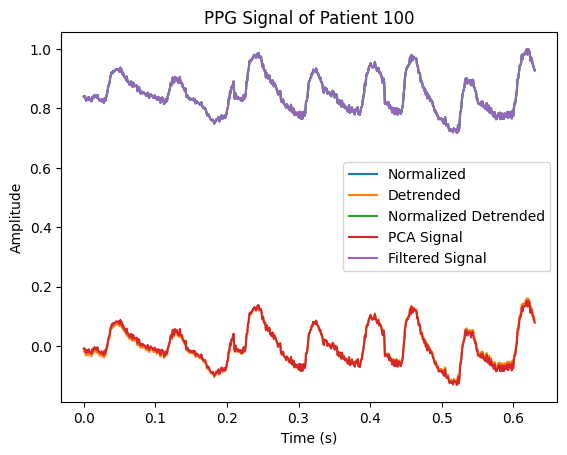

In [9]:
from scipy import signal

x = np.linspace(0, N*T, N)
y = np.array(ppg)
y_normalized = y / np.max(np.abs(y), axis=0)
y_detrended =  signal.detrend(y_normalized, axis=0)
plt.plot(x, y_normalized, label="Normalized")
plt.plot(x, y_detrended, label="Detrended")
plt.title("PPG Signal of Patient 100")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.plot(x, y_normalized, label="Normalized Detrended")
pca = PCA(n_components=0.10)
pca_signal = pca.fit_transform(y_normalized.reshape(-1, 1))
plt.plot(x, pca_signal, label="PCA Signal")


# Define the bandpass filter
lowcut = 0.4
highcut = 4.0
nyquist = 0.5 * len(pca_signal)
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(4, [low, high], btype='band')

# Apply the bandpass filter to the PPG signal
filtered_ppg_signal = signal.filtfilt(b, a, pca_signal, axis=0)

plt.plot(x, y_normalized, label="Filtered Signal")
plt.legend()

Separate the dataframe into input and target groups

In [10]:
list_of_dropped_columns = ["systolic_blood_pressure", "diastolic_blood_pressure", "heartrate", "subject_id"]

target_df = df[["systolic_blood_pressure", "diastolic_blood_pressure", "heartrate"]]
input_df = df.drop(list_of_dropped_columns, axis=1)
input_df

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,1994.0,1983.0,2027.0,1993.0,1987.0,2000.0,1981.0,1991.0,1980.0,1991.0,...,2224.0,2231.0,2189.0,2201.0,2185.0,2171.0,2138.0,2110.0,2147.0,2114.0
1,1942.0,1957.0,1955.0,1955.0,1932.0,1957.0,1909.0,1934.0,1909.0,1916.0,...,2383.0,2367.0,2360.0,2290.0,2315.0,2298.0,2267.0,2248.0,2231.0,2212.0
2,2003.0,2007.0,1995.0,1970.0,1989.0,1992.0,1973.0,1998.0,1983.0,1977.0,...,1901.0,1913.0,1981.0,1984.0,2047.0,2031.0,2080.0,2077.0,2099.0,2123.0
3,2147.0,2143.0,2164.0,2164.0,2158.0,2139.0,2156.0,2127.0,2134.0,2086.0,...,2165.0,2120.0,2129.0,2096.0,2118.0,2060.0,2073.0,2078.0,2047.0,2066.0
4,1857.0,1875.0,1857.0,1867.0,1863.0,1872.0,1865.0,1937.0,1969.0,1990.0,...,2000.0,2039.0,2097.0,2097.0,2139.0,2153.0,2144.0,2154.0,2153.0,2158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,2050.0,2064.0,2004.0,1998.0,2030.0,1995.0,2009.0,1957.0,1995.0,1936.0,...,2183.0,2179.0,2172.0,2174.0,2199.0,2196.0,2143.0,2152.0,2160.0,2140.0
653,2167.0,2169.0,2154.0,2153.0,2086.0,2073.0,2095.0,2039.0,2071.0,2054.0,...,1914.0,1989.0,2047.0,2085.0,2122.0,2141.0,2157.0,2186.0,2197.0,2242.0
654,1961.0,1994.0,1983.0,1987.0,1960.0,1998.0,1966.0,1982.0,1954.0,1956.0,...,2067.0,2017.0,2024.0,2024.0,2053.0,2044.0,2048.0,2029.0,2060.0,2059.0
655,2011.0,2037.0,1999.0,1983.0,2020.0,2007.0,2001.0,2007.0,1984.0,1981.0,...,2035.0,1996.0,2026.0,1986.0,1992.0,2023.0,2015.0,1984.0,2000.0,2005.0


Use a MinMaxScaler to scale the data

In [11]:
scaler = StandardScaler()
input_df = signal.detrend(input_df)
scaler.fit(input_df)
input_df = scaler.transform(input_df)
input_df = pd.DataFrame(input_df)
input_df

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,-0.383990,-0.374659,-0.149953,-0.280419,-0.289646,-0.203925,-0.289041,-0.223277,-0.283293,-0.221798,...,0.972762,0.986255,0.752103,0.788008,0.678531,0.591333,0.428116,0.291997,0.438184,0.287482
1,-0.018908,0.107613,0.139787,0.171493,0.094609,0.244117,0.023393,0.169626,0.041330,0.083798,...,1.739553,1.631012,1.550244,1.186171,1.249968,1.136469,0.970300,0.862789,0.760773,0.660322
2,-0.419341,-0.342687,-0.367720,-0.459159,-0.351794,-0.313729,-0.399722,-0.254880,-0.333882,-0.362776,...,-0.102053,-0.050783,0.256417,0.261463,0.527942,0.437047,0.640048,0.612196,0.687604,0.771689
3,0.621730,0.678990,0.839417,0.890584,0.925746,0.877343,1.013014,0.898887,0.962225,0.725424,...,0.732204,0.495387,0.509334,0.337366,0.410842,0.129684,0.174816,0.183939,0.046147,0.115187
4,-0.634641,-0.504225,-0.566132,-0.503422,-0.512421,-0.451746,-0.485136,-0.101079,0.071028,0.193441,...,0.132955,0.308650,0.559428,0.541897,0.702218,0.739326,0.678854,0.703749,0.676450,0.678985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0.291743,0.420638,0.203283,0.209655,0.400864,0.261913,0.359508,0.112391,0.320146,0.009702,...,0.785184,0.745065,0.678557,0.666653,0.744708,0.703382,0.448111,0.470258,0.486729,0.387075
653,0.635121,0.719731,0.719646,0.764107,0.500722,0.474074,0.621933,0.360866,0.544909,0.469774,...,-0.362263,-0.007922,0.247557,0.412837,0.553656,0.615626,0.667171,0.774697,0.795535,0.961883
654,-0.127245,0.076410,0.067329,0.116538,0.018972,0.231815,0.093219,0.194807,0.052029,0.068374,...,0.144798,-0.111080,-0.098317,-0.106552,0.009447,-0.046311,-0.038741,-0.131644,0.000624,-0.013170
655,0.104163,0.282230,0.159517,0.118743,0.330975,0.299504,0.296779,0.350880,0.239538,0.233117,...,0.132279,-0.069772,0.052309,-0.144815,-0.131977,-0.005740,-0.051106,-0.195408,-0.123638,-0.110192


In [12]:
X = input_df.values
y = target_df.values
input_shape = X.shape
input_shape

(657, 210)

In [13]:
# Define the model
model = models.Sequential()

# Layer 1
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(210, 1)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.AveragePooling1D(pool_size=2))

# Layer 2
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.AveragePooling1D(pool_size=2))

# Layer 3
model.add(layers.Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

# Layer 4
model.add(layers.Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))  # You can adjust the dropout rat`e as needed

# Layer 5
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='linear'))  # 3 outputs for regression


In [14]:
base_learning_rate = 0.00001
momentum = 0.3
optimizer = tf.keras.optimizers.SGD(learning_rate=base_learning_rate, momentum=momentum)

# Compile the model (you can adjust the optimizer and loss as needed)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 208, 64)           256       
                                                                 
 batch_normalization (BatchN  (None, 208, 64)          256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 208, 64)           0         
                                                                 
 average_pooling1d (AverageP  (None, 104, 64)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 102, 128)          24704     
                                                                 
 batch_normalization_1 (Batc  (None, 102, 128)         5

Training the model

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
epochs = 50  # You can adjust the number of epochs as needed
batch_size = 16  # You can adjust the batch size as needed

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/50


33/33 [==============================] - 6s 48ms/step - loss: 6531.6514 - accuracy: 0.8743 - val_loss: 9301.0312 - val_accuracy: 1.0000
Epoch 2/50
33/33 [==============================] - 0s 12ms/step - loss: 2160.0618 - accuracy: 0.9943 - val_loss: 9299.6777 - val_accuracy: 1.0000
Epoch 3/50
33/33 [==============================] - 0s 11ms/step - loss: 693.9964 - accuracy: 0.9943 - val_loss: 9293.9219 - val_accuracy: 1.0000
Epoch 4/50
33/33 [==============================] - 0s 12ms/step - loss: 369.5967 - accuracy: 0.9943 - val_loss: 9286.0400 - val_accuracy: 1.0000
Epoch 5/50
33/33 [==============================] - 0s 12ms/step - loss: 278.0172 - accuracy: 0.9943 - val_loss: 9256.1641 - val_accuracy: 1.0000
Epoch 6/50
33/33 [==============================] - 0s 13ms/step - loss: 263.9877 - accuracy: 0.9943 - val_loss: 9216.3154 - val_accuracy: 1.0000
Epoch 7/50
33/33 [==============================] - 0s 12ms/step - loss: 280.8322 - accuracy: 0.9943 - val_loss: 9125.7070 - val_accu

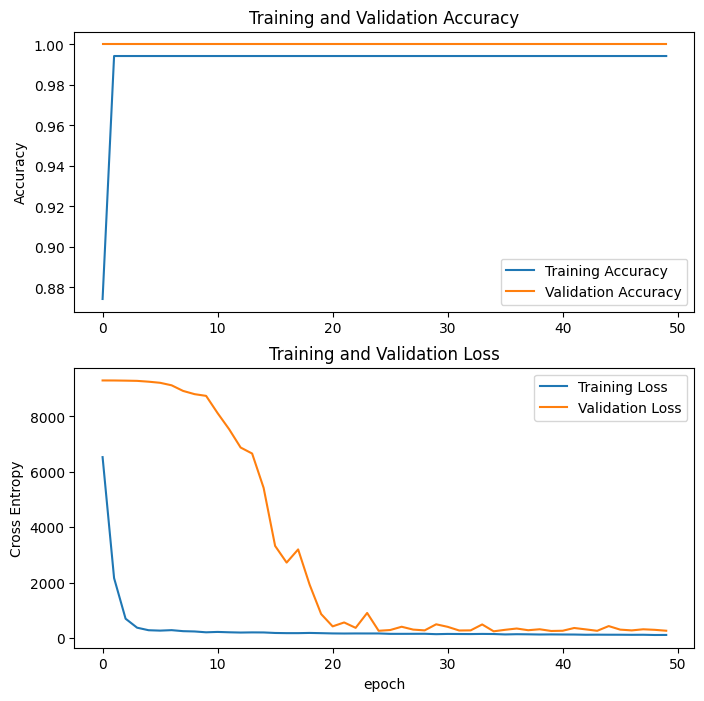

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [20]:
results = model.predict(X_test)

5/5 [==============================] - 1s 3ms/step


In [21]:
y_test

array([[160,  77,  59],
       [138,  69,  76],
       [115,  62,  82],
       [173, 107,  93],
       [109,  68,  87],
       [100,  63,  83],
       [109,  64,  71],
       [182,  80, 101],
       [110,  75,  78],
       [128,  79,  72],
       [161,  89,  97],
       [169,  90,  91],
       [104,  70,  63],
       [136,  64,  82],
       [147,  79,  68],
       [133,  72,  76],
       [126,  78,  84],
       [110,  75,  78],
       [101,  63,  62],
       [108,  65,  74],
       [ 96,  67,  82],
       [101,  70,  79],
       [110,  63,  85],
       [164,  73,  85],
       [147,  70,  58],
       [122,  77,  76],
       [129,  64,  67],
       [124,  85,  94],
       [132,  62,  75],
       [126,  78,  84],
       [118,  71,  84],
       [100,  71,  85],
       [118,  71,  84],
       [161,  89,  72],
       [126,  65,  66],
       [139,  85,  80],
       [154,  88,  80],
       [132,  62,  75],
       [106,  69,  67],
       [124,  79,  68],
       [137,  80,  81],
       [123,  62

In [22]:
arr = np.abs(y_test - results)
arr.astype(int)

array([[41, 12,  5],
       [ 6,  0,  1],
       [26, 15,  0],
       [60, 39, 25],
       [21,  5,  2],
       [ 3,  6, 14],
       [ 0,  5, 13],
       [51,  7, 22],
       [12,  3,  6],
       [20,  1,  8],
       [10,  5,  8],
       [44, 20, 18],
       [10, 16,  8],
       [18,  5, 11],
       [19,  9,  3],
       [ 7,  3,  4],
       [ 8,  7, 12],
       [ 3, 12, 12],
       [13,  1,  2],
       [10,  3,  2],
       [30,  8,  6],
       [ 1,  8, 15],
       [ 7,  2, 13],
       [34,  0,  7],
       [33,  3,  3],
       [ 8,  3,  1],
       [ 6, 12, 12],
       [16, 21, 25],
       [14,  2,  2],
       [21, 15, 23],
       [32,  9,  7],
       [ 3, 12, 19],
       [22,  5,  4],
       [32, 16,  2],
       [13,  1,  1],
       [22, 17, 12],
       [37, 22, 15],
       [ 7, 12,  5],
       [ 6,  6,  4],
       [16,  0,  8],
       [11,  6,  1],
       [ 7,  6, 13],
       [34, 19,  7],
       [23, 21, 14],
       [23, 13,  3],
       [13,  4,  0],
       [23,  2,  4],
       [ 4,  

In [23]:
rmse = tf.sqrt(tf.reduce_mean(tf.square(results - y_test)))
rmse.numpy()

16.12319286034657

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test[2], results[2]))
rms

17.366385712137667

In [27]:
model.save('fft_model.h5')

In [ ]:
model.weights

[<tf.Variable 'conv1d/kernel:0' shape=(3, 1, 64) dtype=float32, numpy=
 array([[[-0.01899141, -0.12895578,  0.00959825, -0.10220522,
           0.15690239,  0.09120887, -0.02021323, -0.1816899 ,
          -0.10901593,  0.14117952,  0.09277454, -0.08241797,
           0.04754154, -0.1515262 , -0.01409099,  0.17471915,
           0.09588616, -0.20095459,  0.11587352, -0.07678482,
          -0.03757598, -0.03921561,  0.10369573,  0.10021866,
          -0.16238612, -0.03702659, -0.00199702, -0.01472142,
          -0.06639276, -0.09400446,  0.08079603,  0.14010905,
           0.10044757, -0.01319007,  0.14026116,  0.17238927,
          -0.012803  , -0.13816322, -0.10686425, -0.03066298,
          -0.01381099,  0.00882818,  0.00357076,  0.15625283,
           0.00085103, -0.17954479, -0.02134655, -0.06302365,
          -0.14097112, -0.1050019 , -0.03725563, -0.03303744,
          -0.01120301, -0.16918741,  0.151259  ,  0.07916596,
          -0.14005582,  0.04400235, -0.04568806, -0.14742167,

Testing using HeartPy

In [127]:
import heartpy

In [191]:
sample_number = 20

In [192]:
sample = X_test[sample_number]

In [193]:
working_data, measures = heartpy.process(sample, sample_rate=100.0)

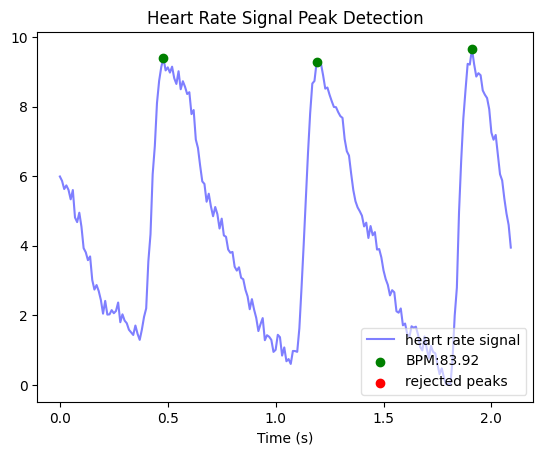

In [194]:
heartpy.plotter(working_data=working_data, measures=measures)

In [195]:
for measure in measures.keys():
    print('%s: %f' % (measure, measures[measure]))

bpm: 83.916084
ibi: 715.000000
sdnn: 5.000000
sdsd: 0.000000
rmssd: 10.000000
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 5.000000
sd1: 0.000000
sd2: 0.000000
s: 0.000000
sd1/sd2: nan
breathingrate: nan


In [196]:
y_test[sample_number]

array([96, 67, 82], dtype=int64)

In [197]:
results[sample_number]

array([126.517426,  75.35723 ,  88.18448 ], dtype=float32)